<a href="https://colab.research.google.com/github/jessie040718/CVFX-homework-5/blob/master/hw5_team7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv_python==3.4.2.16 
!pip install opencv-contrib-python==3.4.2.16

     |████████████████████████████████| 25.0MB 1.4MB/s 
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: opencv-python 3.4.5.20
    Uninstalling opencv-python-3.4.5.20:
      Successfully uninstalled opencv-python-3.4.5.20


     |████████████████████████████████| 30.6MB 47.9MB/s 
  Found existing installation: opencv-contrib-python 3.4.3.18
    Uninstalling opencv-contrib-python-3.4.3.18:
      Successfully uninstalled opencv-contrib-python-3.4.3.18


In [1]:
# Import package for feature matching 
# Connect to Google Drive from youtself
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
def SURF_extract(img1, img2, mask):
  # Initiate SURF detector
  surf = cv2.xfeatures2d.SURF_create()

  # find the keypoints and descriptors with SURF
  kp1, des1 = surf.detectAndCompute(img1,mask)
  kp2, des2 = surf.detectAndCompute(img2,mask)

  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  # Match descriptors.
  matches = bf.match(des1,des2)

  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)

  # Take the best 15% matches.
  GOOD_MATCH_PERCENT = 0.15
  goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:goodMatch]
  
  # Extract location of good matches
  points1 = np.zeros((goodMatch, 2), dtype=np.float32)
  points2 = np.zeros((goodMatch, 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

  # Find homography
  h, _ = cv2.findHomography(points2, points1, cv2.RANSAC)     # make img2 to match img1

  # Use homography
  height, width, channels = img1.shape
  im1Reg = cv2.warpPerspective(img2,  h, (width, height))
  
  return im1Reg

In [0]:
def SIFT_extract(img1, img2, mask):
  # Initiate SIFT detector
  sift = cv2.xfeatures2d.SIFT_create()

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,mask)
  kp2, des2 = sift.detectAndCompute(img2,mask)

  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  # Match descriptors.
  matches = bf.match(des1,des2)

  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)

  # Take the best 15% matches.
  GOOD_MATCH_PERCENT = 0.15
  goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:goodMatch]

  
  # Extract location of good matches
  points1 = np.zeros((goodMatch, 2), dtype=np.float32)
  points2 = np.zeros((goodMatch, 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

  # Find homography
  h, _ = cv2.findHomography(points2, points1, cv2.RANSAC)     # make img2 to match img1

  # Use homography
  height, width, channels = img1.shape
  im1Reg = cv2.warpPerspective(img2,  h, (width, height))

  return im1Reg

In [5]:
!ls '/content/drive/My Drive/cvfx-hw5'

1.JPG  live_ps2.gif	    live_surf3_PS2_1.png  p1.JPG  p9.JPG
2.JPG  live_ps.gif	    live_surf3_PS2_2.png  p2.JPG  tree_sift.gif
3.JPG  live_sift2.gif	    live_surf3_PS2_3.png  p3.JPG  tree_sift_PS1.png
4.JPG  live_sift3.gif	    live_surf3_PS2_4.png  p4.JPG  tree_sift_PS2.png
5.JPG  live_sift.gif	    live_surf3_PS2_5.png  p5.JPG  tree_sift_ps.gif
6.JPG  live_surf2.gif	    live_surf3_PS_2.png   p6.JPG  tree_surf.gif
7.JPG  live_surf3.gif	    live_surf.gif	  p7.JPG
8.JPG  live_surf3_PS_1.png  p10.JPG		  p8.JPG


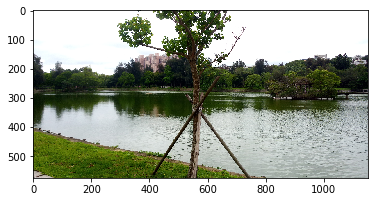

(<matplotlib.image.AxesImage at 0x7f8f1afe8908>, None)

In [0]:
img1 = cv2.resize(cv2.imread('/content/drive/My Drive/CVHW5/6.jpg', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.25, fy=0.25)
img2 = cv2.resize(cv2.imread('/content/drive/My Drive/CVHW5/5.jpg', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.25, fy=0.25)
plt.imshow(img1),plt.show()

## Making mask

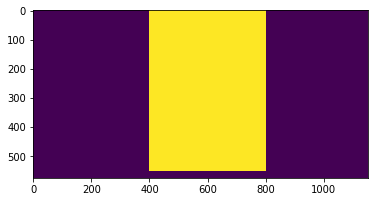

(<matplotlib.image.AxesImage at 0x7f8f16f014a8>, None)

In [0]:
from PIL import Image
gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

mask = np.zeros(img1.shape[:2], dtype=np.uint8)

# draw your selected ROI on the mask image
cv2.rectangle(mask, (400,0), (800,550), (255), thickness = -1)

plt.imshow(mask),plt.show()

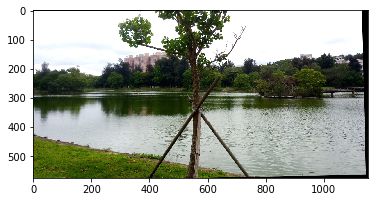

(<matplotlib.image.AxesImage at 0x7fe230f8fb00>, None)

In [0]:
im1Reg = SURF_extract(img1,img2,mask)
plt.imshow(im1Reg),plt.show()

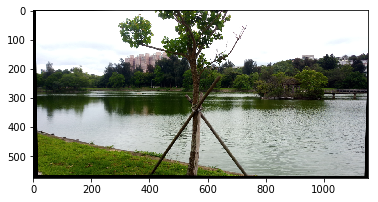

(<matplotlib.image.AxesImage at 0x7fe230f66780>, None)

In [0]:
im2Reg = SIFT_extract(img1,img2,mask)
plt.imshow(im2Reg),plt.show()

## Check warping results
SURF

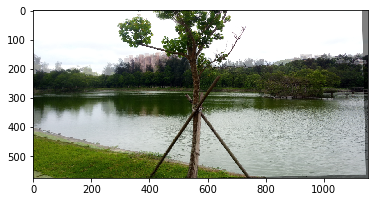

(<matplotlib.image.AxesImage at 0x7fe230f3e4a8>, None)

In [0]:
im2 = cv2.addWeighted(img1, 0.5,im1Reg, 0.5, 0)
plt.imshow(im2),plt.show()

SIFT

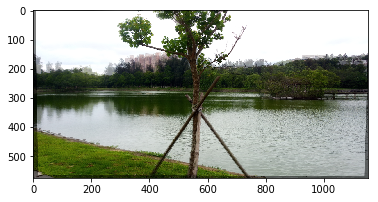

(<matplotlib.image.AxesImage at 0x7fe230e98128>, None)

In [0]:
im3 = cv2.addWeighted(img1, 0.5,im2Reg, 0.5, 0)
plt.imshow(im3),plt.show()

## After PS


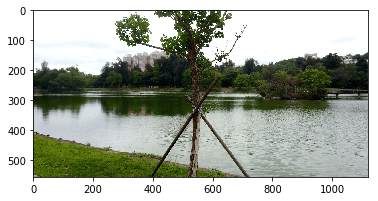

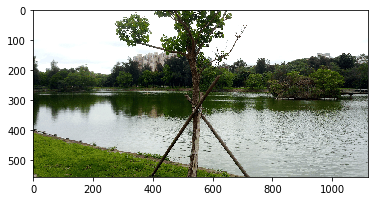

(<matplotlib.image.AxesImage at 0x7fcf4c6ec080>, None)

In [0]:
img_ps1 = cv2.imread('/content/drive/My Drive/cvfx-hw5/tree_sift_PS2.png', cv2.IMREAD_COLOR)[...,::-1]
img_ps2 = cv2.imread('/content/drive/My Drive/cvfx-hw5/tree_sift_PS1.png', cv2.IMREAD_COLOR)[...,::-1]
plt.imshow(img_ps1), plt.show()
plt.imshow(img_ps2), plt.show()

## Saving gif

In [0]:
import imageio
from PIL import Image


i = []
i.append(np.asarray(Image.fromarray(img_ps1, 'RGB')))
i.append(np.asarray(Image.fromarray(img_ps2, 'RGB')))

imageio.mimsave('/content/drive/My Drive/cvfx-hw5/tree_sift_ps.gif', i,fps=1.5) # you can set the fps

### for live photo aafter ps

In [0]:
import imageio
from PIL import Image


i = []
i.append(cv2.imread('/content/drive/My Drive/cvfx-hw5/live_surf3_PS2_1.png', cv2.IMREAD_COLOR)[...,::-1])
i.append(cv2.imread('/content/drive/My Drive/cvfx-hw5/live_surf3_PS2_2.png', cv2.IMREAD_COLOR)[...,::-1])
i.append(cv2.imread('/content/drive/My Drive/cvfx-hw5/live_surf3_PS2_3.png', cv2.IMREAD_COLOR)[...,::-1])
i.append(cv2.imread('/content/drive/My Drive/cvfx-hw5/live_surf3_PS2_4.png', cv2.IMREAD_COLOR)[...,::-1])
i.append(cv2.imread('/content/drive/My Drive/cvfx-hw5/live_surf3_PS2_5.png', cv2.IMREAD_COLOR)[...,::-1])

imageio.mimsave('/content/drive/My Drive/cvfx-hw5/live_ps4.gif', i,fps=7.5) # you can set the fps


## Live photo

In [0]:
imgs = []

imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/2.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/3.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/4.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/5.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/6.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))

In [0]:
from PIL import Image
for n, i in enumerate(imgs):
  imgs[n] = np.asarray(Image.fromarray(i, 'RGB').crop((0,250,i.shape[1],i.shape[0])))

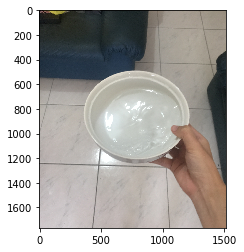

(<matplotlib.image.AxesImage at 0x7fd21a4219b0>, None)

In [0]:
plt.imshow(imgs[2]),plt.show()

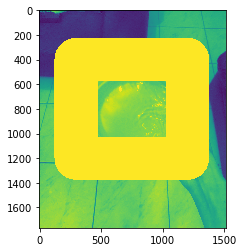

(<matplotlib.image.AxesImage at 0x7fd21aefbc88>, None)

In [0]:
from PIL import Image
gray = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2GRAY)

mask = np.zeros(imgs[0].shape[:2], dtype=np.uint8)

# draw your selected ROI on the mask image
cv2.rectangle(mask, (300,400), (1200,1200), (255), 350)

plt.imshow(cv2.add(mask, imgs[0][...,0])),plt.show()

In [0]:
def SIFT_extract_live(img1, img2, mask):
  # Initiate SIFT detector
  sift = cv2.xfeatures2d.SIFT_create()

  # find the keypoints and descriptors with SIFT
  kp1, des1 = sift.detectAndCompute(img1,mask)
  kp2, des2 = sift.detectAndCompute(img2,mask)

  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  # Match descriptors.
  matches = bf.match(des1,des2)

  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)

  # Take the best 15% matches.
  GOOD_MATCH_PERCENT = 0.15
  goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
  print(goodMatch)
  matches = matches[:goodMatch]

  img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
  plt.imshow(img3),plt.show()
  
  # Extract location of good matches
  points1 = np.zeros((goodMatch, 2), dtype=np.float32)
  points2 = np.zeros((goodMatch, 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

  # Find homography
  h, _ = cv2.findHomography(points2, points1, cv2.RANSAC)     # make img2 to match img1

  # Use homography
  height, width, channels = img1.shape
  im1Reg = cv2.warpPerspective(img2,  h, (width, height))

  return im1Reg



30


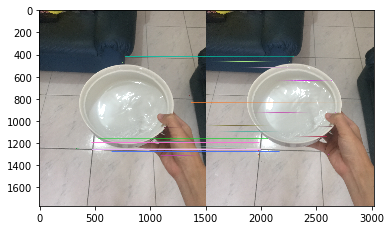

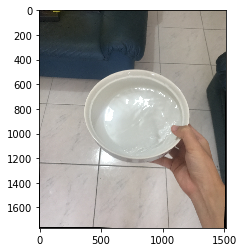

43


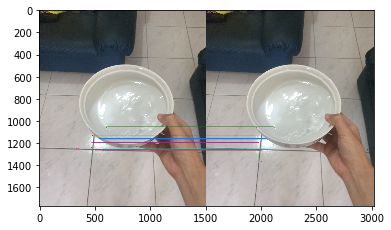

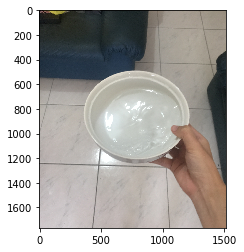

23


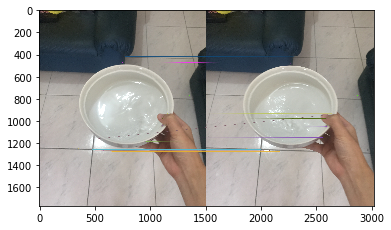

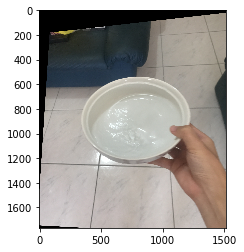

23


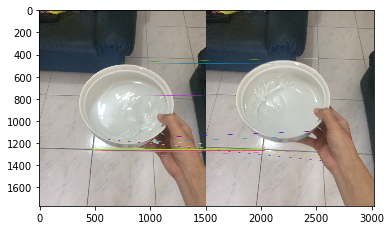

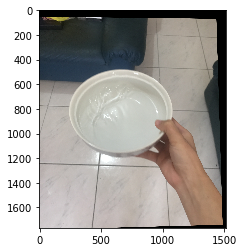

In [0]:
imgs_sift = []
imgs_sift.append(imgs[0])
for n, i in enumerate(imgs):
  if n!=0:
    imgs_sift.append(SIFT_extract_live(imgs[2], i, mask))
    plt.imshow(imgs_sift[n]), plt.show()

5


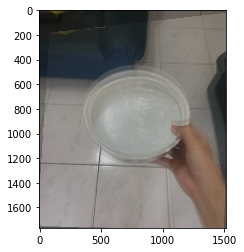

(<matplotlib.image.AxesImage at 0x7fd21a599f28>, None)

In [0]:
n = len(imgs_sift)
print(n)
im = np.zeros_like(imgs_sift[0])
for i in range(0,n-1,2):
  im += cv2.addWeighted(imgs_sift[i], 1/n, imgs_sift[i+1], 1/n, 0)
plt.imshow(im), plt.show()

## Saving gif

In [0]:
import imageio
from PIL import Image


i = []
# i.append(np.asarray(Image.fromarray(img_ps1, 'RGB')))
# i.append(np.asarray(Image.fromarray(img_ps2, 'RGB')))


imageio.mimsave('/content/drive/My Drive/cvfx-hw5/live_sift.gif', imgs_sift,fps=1.5) # you can set the fps

## SURF

In [0]:
def SURF_extract_live(img1, img2, mask):
  # Initiate SURF detector
  surf = cv2.xfeatures2d.SURF_create()

  # find the keypoints and descriptors with SURF
  kp1, des1 = surf.detectAndCompute(img1,mask)
  kp2, des2 = surf.detectAndCompute(img2,mask)

  # create BFMatcher object
  bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)

  # Match descriptors.
  matches = bf.match(des1,des2)

  # Sort them in the order of their distance.
  matches = sorted(matches, key = lambda x:x.distance)

  # Take the best 15% matches.
  GOOD_MATCH_PERCENT = 0.3
  goodMatch = int(len(matches) * GOOD_MATCH_PERCENT)
  matches = matches[:goodMatch]
  
  img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches,None, flags=2)
  plt.imshow(img3),plt.show()
  
  
  # Extract location of good matches
  points1 = np.zeros((goodMatch, 2), dtype=np.float32)
  points2 = np.zeros((goodMatch, 2), dtype=np.float32)

  for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

  # Find homography
  h, _ = cv2.findHomography(points2, points1, cv2.RANSAC)     # make img2 to match img1

  # Use homography
  height, width, channels = img1.shape
  im1Reg = cv2.warpPerspective(img2,  h, (width, height))
  
  return im1Reg

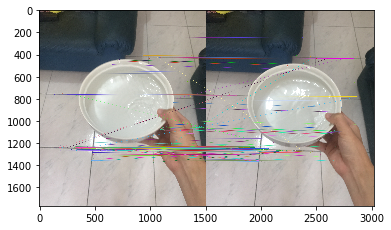

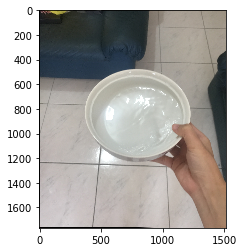

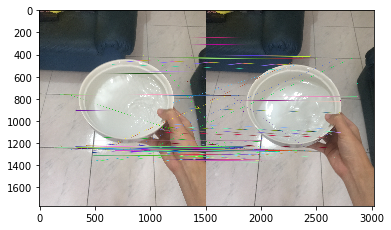

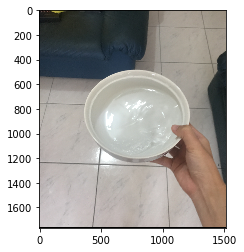

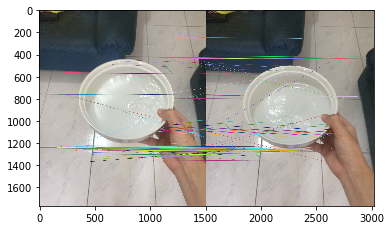

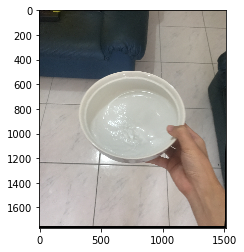

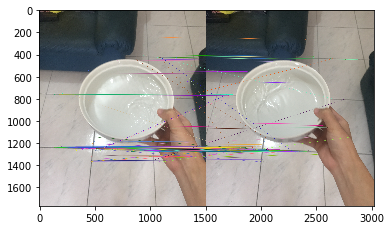

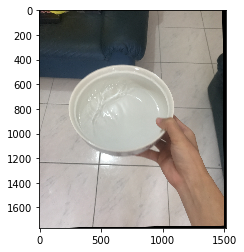

In [0]:
imgs_surf = []
imgs_surf.append(imgs[0])
for n, i in enumerate(imgs):
  if n!=0:
    imgs_surf.append(SURF_extract_live(imgs[0], i, mask))
    plt.imshow(imgs_surf[n]), plt.show()

5


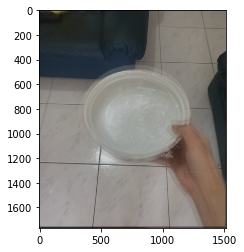

(<matplotlib.image.AxesImage at 0x7fd21a1d7dd8>, None)

In [0]:
n = len(imgs_surf)
print(n)
im = np.zeros_like(imgs_surf[0])
for i in range(0,n-1,2):
  im += cv2.addWeighted(imgs_surf[i], 1/n,imgs_surf[i+1], 1/n, 0)
plt.imshow(im), plt.show()

## Saving gif

In [0]:
import imageio
from PIL import Image


i = []
# i.append(np.asarray(Image.fromarray(img_ps1, 'RGB')))
# i.append(np.asarray(Image.fromarray(img_ps2, 'RGB')))

imageio.mimsave('/content/drive/My Drive/cvfx-hw5/live_surf3.gif', imgs_surf,fps=1.5) # you can set the fps

## Try another set of pics

In [0]:
imgs = []

imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p1.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p2.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p5.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p6.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p7.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p8.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p9.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p10.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p3.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))
imgs.append(cv2.resize(cv2.imread('/content/drive/My Drive/cvfx-hw5/p4.JPG', cv2.IMREAD_COLOR)[...,::-1], None, fx=0.5, fy=0.5))


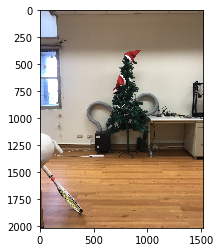

(<matplotlib.image.AxesImage at 0x7f7daf51b128>, None)

In [42]:
plt.imshow(imgs[0]),plt.show()

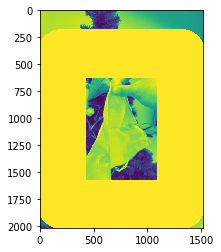

(<matplotlib.image.AxesImage at 0x7f7daf3c5828>, None)

In [28]:
from PIL import Image
gray = cv2.cvtColor(imgs[0], cv2.COLOR_BGR2GRAY)

mask = np.zeros(imgs[0].shape[:2], dtype=np.uint8)

# draw your selected ROI on the mask image
cv2.rectangle(mask, (200,400), (1300,1800), (255), 450)

plt.imshow(cv2.add(mask, imgs[0][...,0])),plt.show()

304


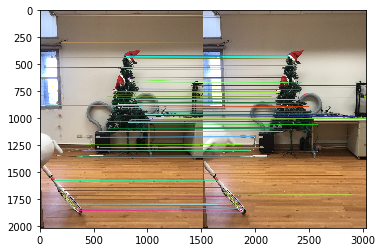

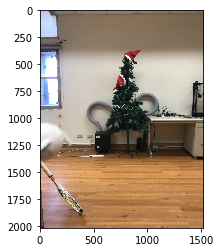

308


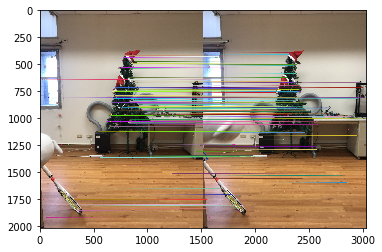

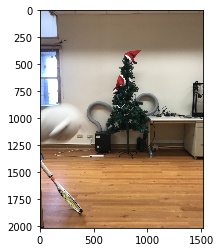

310


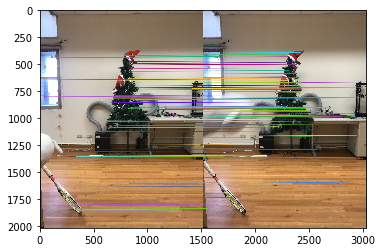

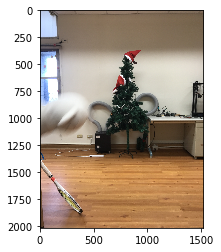

299


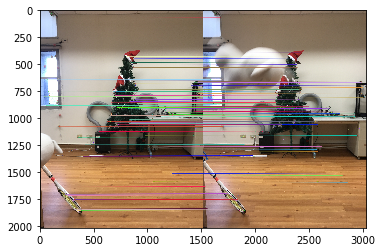

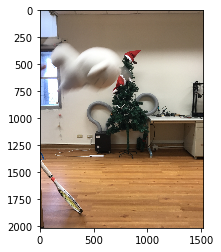

293


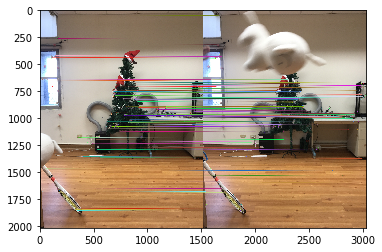

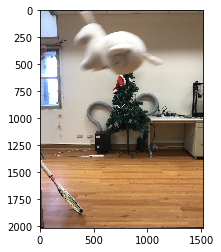

287


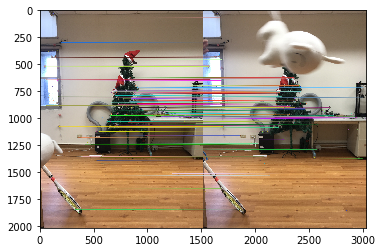

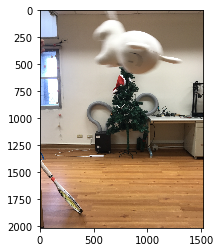

306


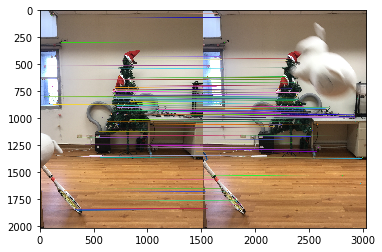

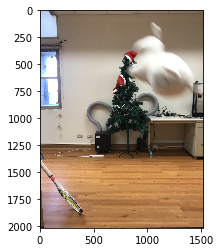

274


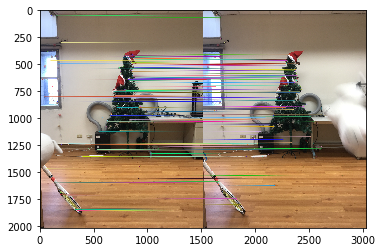

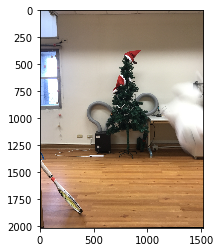

312


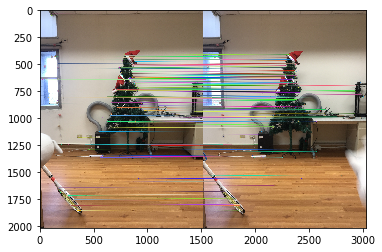

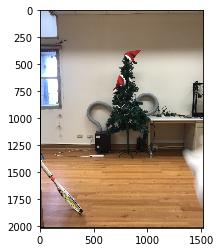

In [48]:
imgs_sift = []
imgs_sift.append(imgs[0])
mask=None
for n, i in enumerate(imgs):
  if n!=0:
    imgs_sift.append(SIFT_extract_live(imgs[0], i, mask))
    plt.imshow(imgs_sift[n]), plt.show()

10


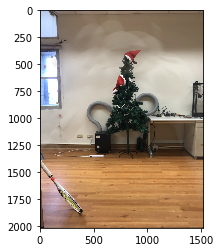

(<matplotlib.image.AxesImage at 0x7f7daf620208>, None)

In [49]:
n = len(imgs_sift)
print(n)
im = np.zeros_like(imgs_sift[0])
for i in range(0,n,2):
  im += cv2.addWeighted(imgs_sift[i], 1/n, imgs_sift[i+1], 1/n, 0)
plt.imshow(im), plt.show()

## Saving gif

In [0]:
import imageio
from PIL import Image


i = []
# i.append(np.asarray(Image.fromarray(img_ps1, 'RGB')))
# i.append(np.asarray(Image.fromarray(img_ps2, 'RGB')))

imageio.mimsave('/content/drive/My Drive/cvfx-hw5/live_sift3.gif', imgs_sift,fps=10) # you can set the fps